In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mood.representations import MOOD_REPRESENTATIONS

In [2]:
path = "gs://experiments-output/mood-v2/results/dataframes/compare_splits/20221219/splits.csv"

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv(path)
# As this looks nicer for the plots
df = df.rename(columns={c: c.capitalize() for c in df.columns})

/home/cas/local/conda/envs/mood_v2/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


<AxesSubplot: xlabel='Split', ylabel='Rank'>

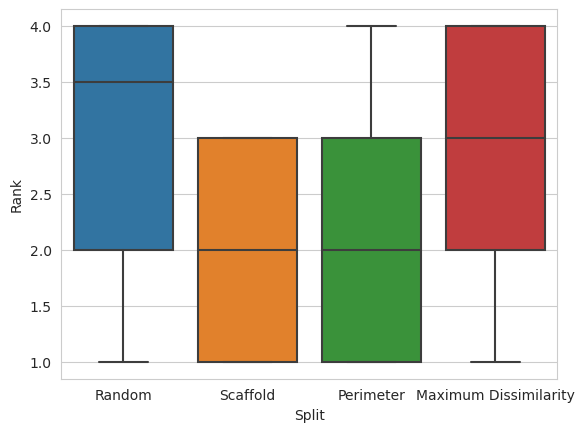

In [5]:
sns.boxplot(data=df, x="Split", y="Rank")

<AxesSubplot: xlabel='Split', ylabel='Relative Score'>

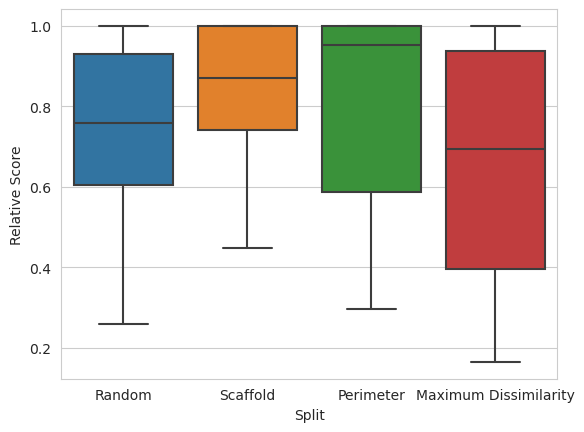

In [6]:
df["Relative Score"] = df.groupby(["Representation", "Dataset"], group_keys=False)["Representativeness"].apply(lambda x: x / max(x))
sns.boxplot(data=df, x="Split", y="Relative Score")

In [7]:
denominator = df[df["Best"]].groupby("Representation").count().iloc[:, 0].unique()
assert len(denominator) == 1
denominator = denominator[0]

In [8]:
counts = df[df["Best"]].value_counts(["Representation", "Split"]).reset_index()
counts = counts.pivot(index="Representation", columns="Split", values=0)
counts = counts / denominator
counts = counts.reindex(MOOD_REPRESENTATIONS)
counts = counts[["Random", "Scaffold", "Perimeter", "Maximum Dissimilarity"]]

In [9]:
cmap = sns.color_palette("deep")
cmap

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

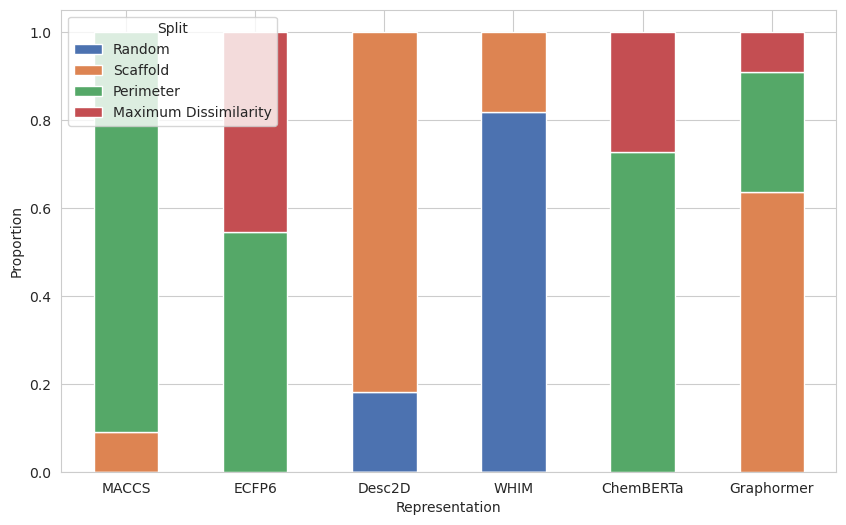

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = [cmap[i] for i in range(df["Split"].nunique())]
ax = counts.plot(kind="bar", stacked=True, ax=ax, color=colors, edgecolor="white", linewidth=1)
ax.set_ylabel("Proportion")
ax.set_xlabel("Representation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

The End. 